In [18]:
from IPython.core.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<center><div><span style="background-color: #F73718; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFFFF; font-size: 30px; font-weight: bold">London Bridge is Burning Down: A Fire Brigade Analysis </span></div></center>

<img src='https://scontent.fmnl31-1.fna.fbcdn.net/v/t39.30808-6/272190817_307049618123787_912878042276076589_n.jpg?_nc_cat=106&ccb=1-7&_nc_sid=e3f864&_nc_eui2=AeEHAG31Mj6Ds04kSa4vMTB29OpZTbYznmH06llNtjOeYaaXT5Y45A-jfp3vCQB9QpM&_nc_ohc=CaKUZO7b2MwAX8WOHWx&tn=Cy3O8-Ww7gVjqrcA&_nc_ht=scontent.fmnl31-1.fna&oh=00_AT8mX0CornzxKqWEIXHBdu7-GarXnQjcd3qeI993YquvPQ&oe=63599FDE' width=1000>

In [10]:
# For data prep
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import sqlite3
from sqlalchemy import create_engine
import openpyxl

# For writeup
from IPython.display import HTML
from IPython.core.display import HTML as Center
import warnings
warnings.filterwarnings('ignore')

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

# Custom plot format
plt.rcParams['figure.figsize'] = 16,6
plt.rcParams['lines.linewidth'] = 3.5
plt.rcParams['figure.titlesize'] = 32

custom_sns_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme('notebook', style='ticks', font_scale=1.5, rc=custom_sns_params)
colors = ['#393357', '#FFD400', '#00A5D3', '#009A57', '#6E3476']
custom_palette = sns.blend_palette(colors, n_colors=8)
sns.set_palette(custom_palette)

In [5]:
engine = create_engine('sqlite:////mnt/processed/private/msds2023/lt9/lfb.db')

In [6]:
df_lfb = pd.read_sql_table('df_lfb', engine)

In [7]:
df_mob = pd.read_sql_table('df_mob', engine)

In [8]:
df_lfb = df_lfb.loc[df_lfb['CalYear'] != 2022]
df_mob = df_mob.loc[df_mob['CalYear'] != 2022]

<div><span style="background-color: #26241B; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFFFF; font-size: 24px; font-weight: bold">EXECUTIVE SUMMARY </span></div>


The London Fire Brigade (LFB) is one of the largest firefighting and rescue organizations in the world. In the UK, they are also the busiest fire and rescue service. Using the incident and the mobilisation datasets of London Fire Brigade (LFB), the study aims to describe the characteristics of LFB's incident response times.



Prior to the analysis, the 2022 data of the datasets were dropped since the year 2022 is still ongoing. Both incident and mobilisation datasets for 2009 to 2021 were consolidated since the data were originally separated into different year groups. The duplicate values were then dropped, and the null values were handled. Many columns from the datasets were also dropped as they were not part of the scope of the study. The dataset was then finally consolidated into a single SQLite database.



The analyses revealed that from 2009 to 2021, the LFB met the response time target of 360 seconds or 6 minutes. In addition, the peak performance (lowest mean response time) of the London Fire Brigade is observed at 9am with a response time of 330.5 seconds and at 10pm with a response time of 328.96 seconds. It was also revealed that only in 2009 and 2010 that the LFB failed to meet the turnout time standard of 90 seconds. Lastly, the lowest travel times was observed between 11am to 7pm.

<div><span style="background-color: #26241B; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFFFF; font-size: 24px; font-weight: bold">INTRODUCTION </span></div>



<h2 style="color:#F73718">Background</h2>

Established in 1833, the London Fire Brigade (LFB) is one of the largest firefighting and rescue organizations in the world. They are also the busiest fire and rescue service in the UK, handling around 100,000 incidents every year. This large magnitude of incident responses is made possible by employing over 5,000 people composed of the operational staff (the firefighters and rescue personnel), the control staff (the staff who take the emergency calls), and the non-uniformed and non-operational staff (support staff like those in IT and Finance). All of the operational staff are full-time, in contrast with other brigades that employ retained firefighters (on-call firefighters who live and work near the station). 

The LFB has 103 fire stations, including one river station. Scattered among these fire stations are 101 dual pump ladders (the main fire appliance of the LFB), 55 pumps, 2 fireboats, and other fire and general rescue equipment. These employees and equipment enable LFB to respond to incident calls 24 hours a day.

Every incident call received by LFB and their response characteristics since January 2009 is available on the London Datastore website, pursuant to the vision of the Greater London Authority (GLA) to make London’s data freely accessible by anyone. The aim of this study is to investigate the incident response times of LFB obtained from this dataset from 2009 up to 2021.


<h2 style="color:#F73718">Problem Statement</h2>

- What are the response time characteristics of the London Fire Brigade? Specifically:
- How did the LFB's response times to incidents differ across the years from 2009 to 2021?
- How did the response time differ by time of day?
- How are the response times distributed?
- How did the LFB's turnout times to incidents differ across the years from 2009 to 2021?
- How did the turnout time differ by time of day?
- How did the LFB's travel times to incidents differ across the years from 2009 to 2021?
- How did the travel time differ by time of day?

<h2 style="color:#F73718">Data Description</h2>

The study utilized two types of datasets from the LFB — the incident and mobilization datasets.

<h3 style="color:#03276F"><u>Incident Dataset</u></h3>

- This dataset contains the details of every incident responded by the LFB since January 2009. Data about when and where the incident happened and the type of incident dealt with are provided.
- https://data.london.gov.uk/dataset/london-fire-brigade-incident-records

<h3 style="color:#03276F"><u>Mobilisation Dataset</u></h3>

- This dataset contains the details of every fire engine (pumping appliance) sent to an incident since January 2009. Data about the appliance mobilised, where it was deployed frp, and the times recorded for arriving at the incident are provided.
- https://data.london.gov.uk/dataset/london-fire-brigade-mobilisation-records

<br />

Specifically, the following files were used in the study:
<h3 style="color:#03276F"><u>List of Datasets Used</u></h3>

- <b style="color:#03276F">LFB Incident Data from 2009 to 2021</b>

    - 'LFB Incident data from January 2009 to December 2012.xlsx'
    - 'LFB Incident data from January 2013 to December 2016.xlsx'
    - 'LFB Incident data from January 2017.xlsx'
    - 'LFB Incident data January 2019 to August 2022.xslx'
    
- <b style="color:#03276F">LFB Mobilisation Data from 2009 to 2021</b>

    - 'LFB Mobilisation data from January 2009.csv'
    - 'LFB Mobilisation data from January 2009 to 2015.csv'
    - 'LFB Mobilisation data from January 2016.csv'
    - 'LFB Mobilisation data Last 3 years January 2019 to August 2022.xlsx'


<div><span style="background-color: #26241B; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFFFF; font-size: 24px; font-weight: bold">METHODOLOGY </span></div>

<img src="Methodology.png"/>

<h2 style="color:#F73718">Data Cleaning and Combining the Data</h2>



From the section <b style="color:#03276F">List of Datasets Used</b>, it was shown that the datasets for Incidents and Mobilisation are separated into four (4) different excel files each which contains all incidents starting from January 2009 to August 2022. In order to prepare the dataset before combining the datasets of Incidents and Mobilisation, the following steps were made:



<h3 style="color:#03276F">Steps:</h3>
    
1. <b style="color:#03276F">Dropped the 2022 data.</b> Since the year 2022 is currently ongoing, this data is dropped in order to reflect coherence in with regards to the timeline of the incidents.




2. <b style="color:#03276F">Consolidated LFB Incident Dataset to includes years 2009 to 2021.</b> Combining all the Incident Datasets into one Incident Dataset Masterfile.




3. <b style="color:#03276F">Consolidated LFB Incident Dataset to includes years 2009 to 2021.</b> Combining all the Incident Datasets into one Mobilisation Dataset Masterfile.




4. <b style="color:#03276F">Dropped duplicate values for both datasets.</b> There are multiple data that are duplicated after consolidating the respective datasets into their respective Masterfiles. In order to get the unique incident numbers and occurences, the duplicates were dropped.




5. <b style="color:#03276F">Handled null values and negative values.</b> After consolidating the respective datasets into their respective Masterfiles. The group checked the number of null values in the datasets. The following were found number of null values (in rows) were found in both Masterfiles:



|Column Name|No. of Null Values (in rows)
|:---|:---|
|TurnoutTimeSeconds|<center>26619</center>|
|TravelTimeSecond|<center>26713</center>|
|DeployedFromStation_Code|<center>28</center>|
|DeployedFromStation_Name|<center>28</center>|
|IncidentGroup|<center>1</center>|
|StopCodeDescription|<center>1</center>|
|PropertyCategory|<center>1</center>|
|IncGeo_WardNameNew|<center>3</center>|
|IncidentsStationGround|<center>1</center>|




   - The following steps were made to handle the null values found above:



<u>**a. Replacing the null values.**</u> Due to the significant number of rows for ***TurnoutTimeSecond*** and ***TravelTimeSecond*** the following methods were done:
  
- **Mean imputation:** In order to maintain the sample size, this method is done for replacing the null values under the ***TurnoutTimeSeconds***. For example, the average *TurnoutTimeSeconds* for the year 2009 was taken and replaced the null values also found under the 2009 database. The same method was applied to the rest of the years.
    
- **Compute for TravelTimeSecond**. The ***TravelTimeSecond*** is computed by subtracting the **AttendanceTimeSeconds** and **TurnoutTimeSeconds**.
   
<u>**b. Dropping the null values.**</u> Due to the the insignificant number of rows for the following columns: ***DeployedFromStation_Code, DeployedFromStation_Name, IncidentGroup, StopCodeDescription, PropertyCategory, IncGeo_WardNameNew, IncidentsStationGround*** the null values under these columns were immediately dropped as it is.

<u>**c. Dropping the negative values.**</u> Negative values found in ***TravelTimeSeconds*** column were dropped.
    
6. <b style="color:#03276F">Dropped columns not needed for the analysis.</b> There are multiple columns that were deemed unnecessary by the group, mostly columns that are attributed to time because the data in these columns were already aggregated to columns such as ***TurnoutTimeSeconds*** and ***AttendanceTimeinSeconds***.




7. <b style="color:#03276F">Consolidated the dataset into a single SQLite database which contained two (2) tables.</b>

<h3 style="color:#03276F"><u>Final Data Description<u></h3>



<b style="color:#03276F">The Incident Dataset</b> has a total of 39 columns and 1.7 million rows. The team has limited the column variables to be used for this EDA to the following listed in **Table 1**.
    
<b style="color:#03276F">The Mobilisation Dataset</b> has 22 columns and 2.06 million rows. The team has limited the variables to be used for this EDA to the following listed in **Table 2**.
    
<b style="color:#F73718">The Final Dataset</b> after data cleaning and variable identification, Incident dataset used for the analysis has 10 columns and 1.65 million rows, while mobilisation dataset has 12 columns and 1.9 million rows.

<center><b>Table 1. Incident Report Dataset</b></center>


|Variable Name|Data type|Variable category|Description
|:---|:---|:---|:---|
|IncidentNumber|numerical|categorical|Recorded fire incident number
|DateOfCall|numerical|categorical|Date of 999 call (01-Jul-18)
|CalYear|numerical|categorical|Year of 999 call
|HourOfCall|numerical|discrete|Hour of 999 call
|IncidentGroup|character|categorical|High level incident category
|StopCodeDescription|character|categorical|Detailed incident category
|PropertyCategory|character|categorical| High level property descriptor
|IncGeo_BoroughName|character|categorical| Borough Name
|IncGeo_WardNameNew|character|categorical| New Ward Name
|IncidentStationGround|character|categorical| LFB Station ground


<center><b>Table 2. Mobilisation Report Dataset</b></center>


|Variable Name|Data type|Variable category|Description
|:---|:---|:---|:---|
|IncidentNumber|numerical|categorical|Recorded fire incident number
|CalYear|numerical|categorical|Year of 999 call
|HourOfCall|numerical|discrete|Hour of 999 call
|ResourceMobilisationId|numerical|categorical|LFB Resource Mobilisation ID
|Resource_Code|character|categorical|LFB Resource Code
|PerformanceReporting|numerical|categorical| First pump arrived at incident
|TurnoutTimeSeconds|numerical|continuous|The time it takes fire engine crews to leave the fire station once they are mobilised
|TravelTimeSeconds|numerical|continuous|Travel time in seconds from station to arrival at the scene of the incident
|AttendanceTimeSeconds|numerical|continuous| Attendance time is seconds (sum of turnout time and travel time)
|DeployedFromStation_Code|character|categorical|Deployed from station code
|DeployedFromStation_Name|character|categorical|Deployed from station name
|PumpOrder|numerical|discrete|Pump order


<img src="LFB Equation.png"/>

<div><span style="background-color: #26241B; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFFFF; font-size: 24px; font-weight: bold">EXPLORATORY DATA ANALYSIS </span></div>

#### How did the London Fire Brigade’s response times to incidents differ across the years from 2009 to 2021?

- From 2009 to 2021, the Response Time of London Fire Brigade meet the set standard of 360 seconds, except in 2015 when average response time was at 365.53 seconds.
- The highest response time was recorded in 2015 and there was an improvement in response time in 2020, or in the middle of the pandemic.
- Very minimal difference in observed average response time from 2009-2021, but presence of outliers (over 600s) is observed.

<center><div><span style="background-color: #03276F; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFFFF; font-size: 25px; font-weight: bold">Response time was an all time best at 2020, during the Pandemic </span></div></center>

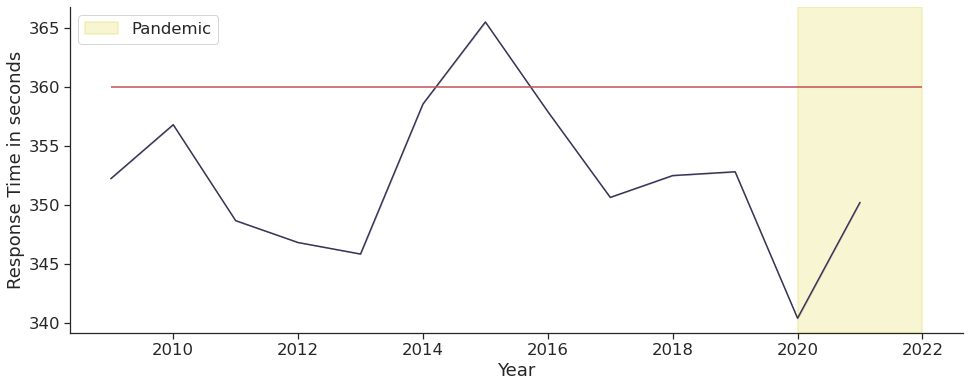

In [11]:
ax = sns.lineplot(data=df_mob,
                  x='CalYear',
                  y='AttendanceTimeSeconds',
                  markers=True,
                  dashes=False,
                  ci=False)
ax.set(xlabel='Year', ylabel='Response Time in seconds')
ax.axvspan(2020, 2022, 
           label='Pandemic',
           color=custom_palette.as_hex()[2], alpha=0.2,
           lw=2)
plt.hlines(360, 2009, 2022, colors='r', linestyles='solid')
plt.legend(loc='best')

plt.show()

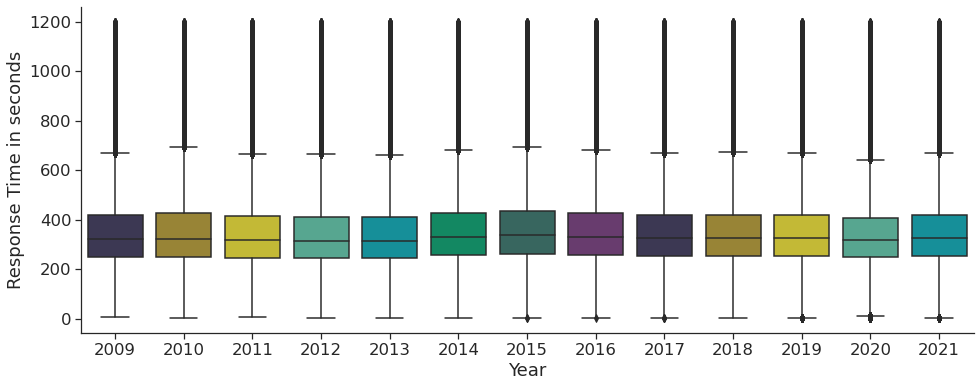

In [24]:
ax = sns.boxplot(data=df_mob, x='CalYear', y='AttendanceTimeSeconds', palette=custom_palette)
ax.set(xlabel='Year', ylabel='Response Time in seconds')
plt.show()

#### How does response time differ by time of day?

- The peak performance (lowest mean response time) of the London Fire Brigade is observed at 9am with a response time of 330.5 seconds and at 10pm with a response time of 328.96 seconds.
- Between the hours of 2am to 6am and 11am to 5pm, average response time is higher than the standard.

<center><div><span style="background-color: #03276F; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFFFF; font-size: 25px; font-weight: bold">LFB Response Times varries throughout the day </span></div></center>

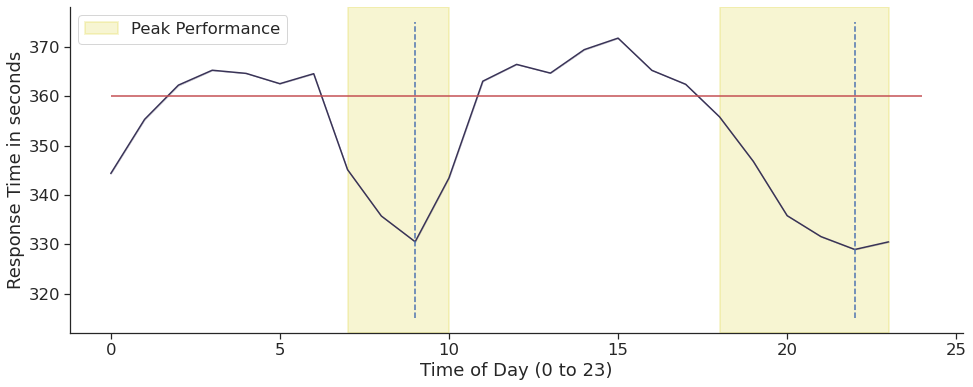

In [13]:
ax = sns.lineplot(data=df_mob,
                  x='HourOfCall',
                  y='AttendanceTimeSeconds',
                  markers=True,
                  dashes=False,
                  ci=False)
ax.set(xlabel='Time of Day (0 to 23)', ylabel='Response Time in seconds')
ax.axvspan(7, 10,
           label='Peak Performance',
           color=custom_palette.as_hex()[2], alpha=0.2,
           lw=2)
ax.axvspan(18, 23,
           color=custom_palette.as_hex()[2], alpha=0.2,
           lw=2)
plt.legend(loc='best')
plt.vlines(9, 315, 375, colors='b', linestyles='dashed')
plt.vlines(22, 315, 375, colors='b', linestyles='dashed')
plt.hlines(360, 0, 24, colors='r', linestyles='solid')
plt.show()

- There is a wider distribution of response time (higher IQR) for hours between 11am to 7pm.

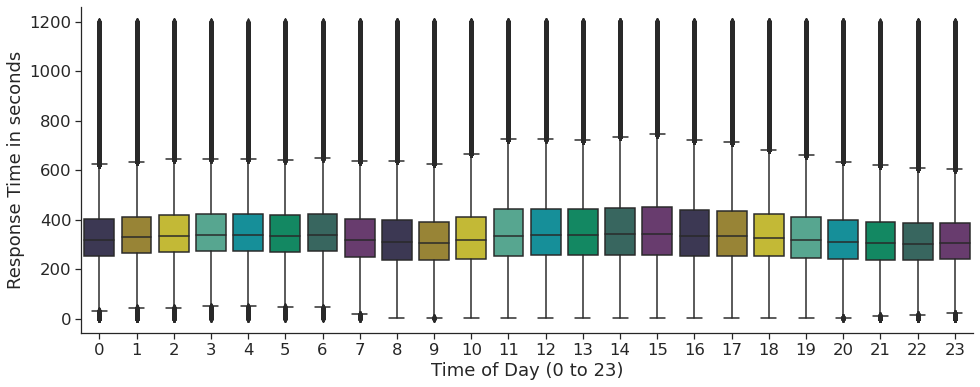

In [26]:
ax = sns.boxplot(data=df_mob, x='HourOfCall', y='AttendanceTimeSeconds', palette=custom_palette)
ax.set(xlabel='Time of Day (0 to 23)', ylabel='Response Time in seconds')
plt.show()

#### How are the response times distributed?

- The overall performance of London Fire Brigade in terms of response time is good, as the average response time of 352 seconds is below the target response time of 360 seconds.
- Around 61% of incident calls received for the years 2009-2021 were attended to within 360 seconds. Nevertheless, presence of outliers is observed.

<center><div><span style="background-color: #03276F; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFFFF; font-size: 25px; font-weight: bold">LFB's Maximum Response time is 1200 seconds </span></div></center>

Maximum Response time is 1200 seconds.
Average Response time is 352 seconds.


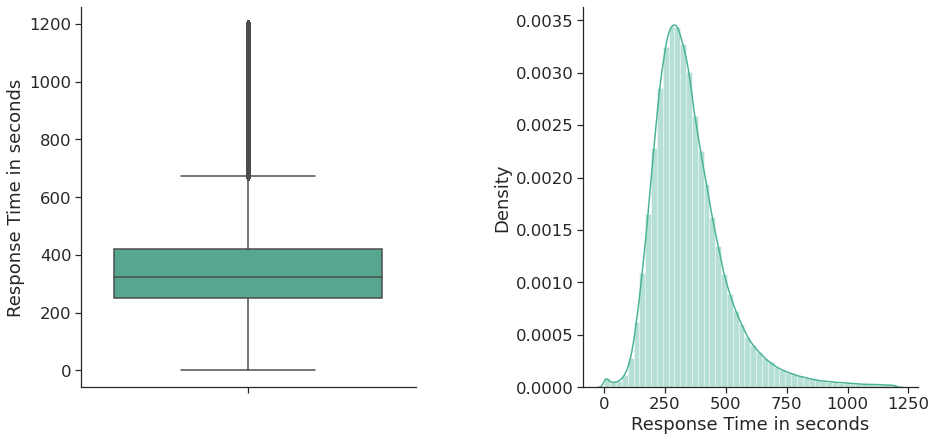

In [14]:
print(f'Maximum Response time is {df_mob.AttendanceTimeSeconds.max()} seconds.')
print(f'Average Response time is {df_mob.AttendanceTimeSeconds.mean():.0f} seconds.')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
ax = sns.boxplot(data=df_mob, y='AttendanceTimeSeconds', ax=axes[0], color=custom_palette[3])
fig = sns.distplot(df_mob['AttendanceTimeSeconds'], ax=axes[1], color=custom_palette[3])
ax.set(ylabel='Response Time in seconds')
fig.set(xlabel='Response Time in seconds')
plt.show()

#### How did the LFB's turnout times to incidents differ across the years from 2009 to 2021?

**Insert Story Here**

<center><div><span style="background-color: #03276F; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFFFF; font-size: 25px; font-weight: bold">LFB's turnout times improved significantly </span></div></center>

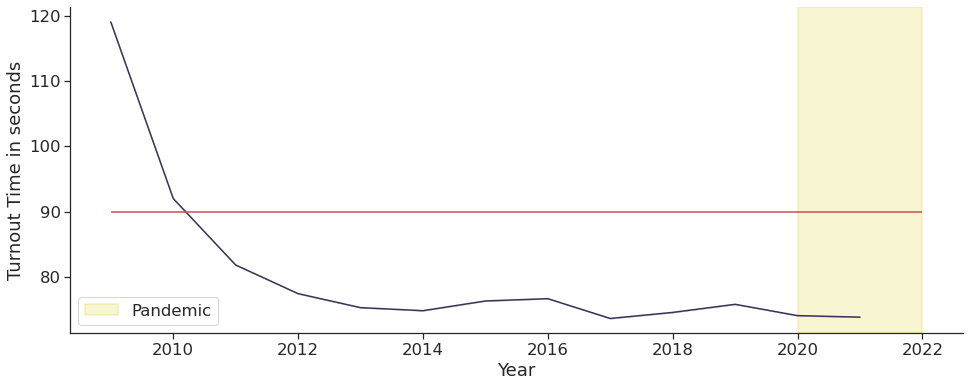

In [27]:
ax = sns.lineplot(data=df_mob,
                  x='CalYear',
                  y='TurnoutTimeSeconds',
                  markers=True,
                  dashes=False,
                  ci=False)
ax.set(xlabel='Year', ylabel='Turnout Time in seconds')
ax.axvspan(2020, 2022, 
           label='Pandemic',
           color=custom_palette.as_hex()[2], alpha=0.2,
           lw=2)
plt.hlines(90, 2009, 2022, colors='r', linestyles='solid')
plt.legend(loc='best')
plt.show()

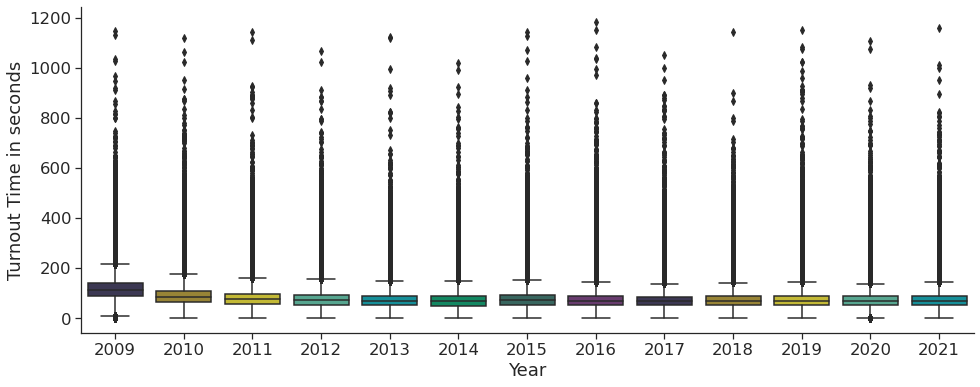

In [28]:
ax = sns.boxplot(data=df_mob, x='CalYear', y='TurnoutTimeSeconds', palette=custom_palette)
ax.set(xlabel='Year', ylabel='Turnout Time in seconds')
plt.show()

#### How did the turnout time differ by time of day?

- The average turnout time varies by time of day.
- It is above standard between 12am to 7am, and highest at 5am.
- Turnout time starts to decline from 8am and starts to peak again at 11pm.

<center><div><span style="background-color: #03276F; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFFFF; font-size: 25px; font-weight: bold">LFB has good turnout times from 8am to 10 pm </span></div></center>

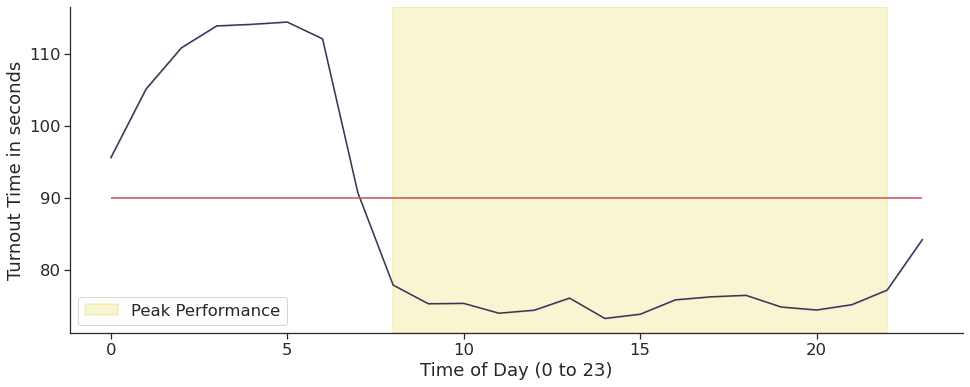

In [29]:
ax = sns.lineplot(data=df_mob,
                  x='HourOfCall',
                  y='TurnoutTimeSeconds',
                  markers=True,
                  dashes=False,
                  ci=False)
ax.set(xlabel='Time of Day (0 to 23)', ylabel='Turnout Time in seconds')
ax.axvspan(8, 22,
           label='Peak Performance',
           color=custom_palette.as_hex()[2], alpha=0.2,
           lw=2)
plt.legend(loc='best')
# plt.vlines(9, 315, 375, colors='b', linestyles='dashed')
# plt.vlines(22, 315, 375, colors='b', linestyles='dashed')
plt.hlines(90, 0, 23, colors='r', linestyles='solid')
plt.show()

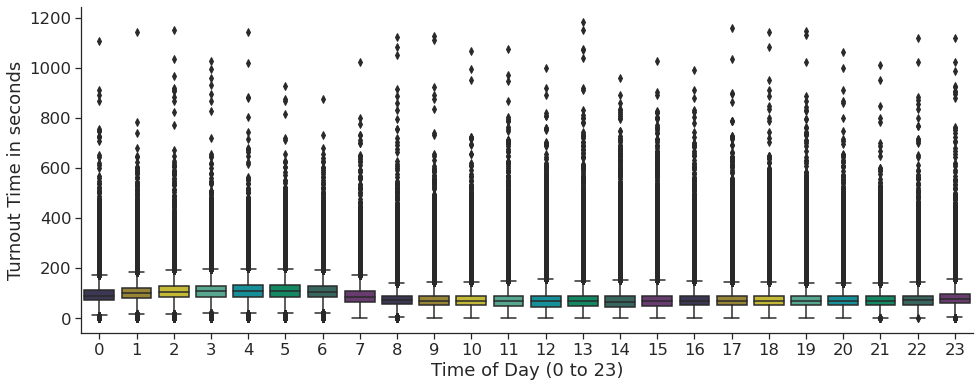

In [30]:
ax = sns.boxplot(data=df_mob, x='HourOfCall', y='TurnoutTimeSeconds', palette=custom_palette)
ax.set(xlabel='Time of Day (0 to 23)', ylabel='Turnout Time in seconds')
plt.show()

#### How did the LFB's travel times to incidents differ across the years from 2009 to 2021?

- The LFB standard for travel time is 270 seconds.
- Average travel time in 2015 is the highest. Note that Response time in 2015 is also the highest. Biggest contributor to response time then is travel time.
- Average travel time is above 270 seconds for 2013 to 2019, dipped in 2020 at the middle the pandemic and increased again in 2021.

<center><div><span style="background-color: #03276F; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFFFF; font-size: 25px; font-weight: bold">LFB does not always achieve its target travel time </span></div></center>

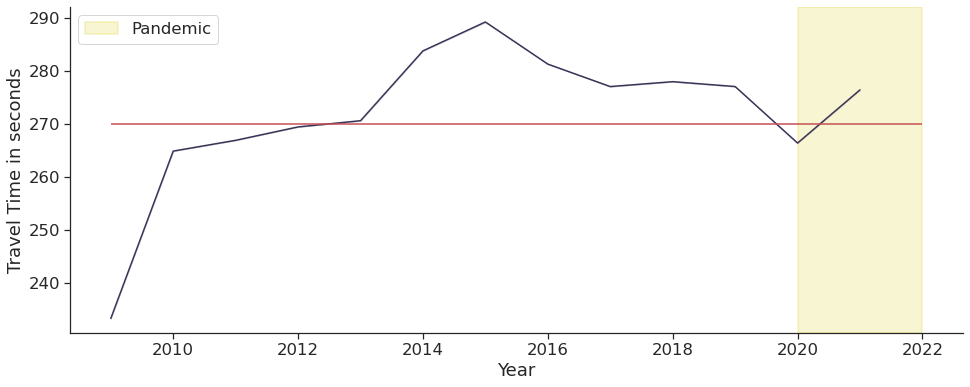

In [31]:
ax = sns.lineplot(data=df_mob,
                  x='CalYear',
                  y='TravelTimeSeconds',
                  markers=True,
                  dashes=False,
                  ci=False)
ax.set(xlabel='Year', ylabel='Travel Time in seconds')
ax.axvspan(2020, 2022, 
           label='Pandemic',
           color=custom_palette.as_hex()[2], alpha=0.2,
           lw=2)
plt.hlines(270, 2009, 2022, colors='r', linestyles='solid')
plt.legend(loc='best')
plt.show()



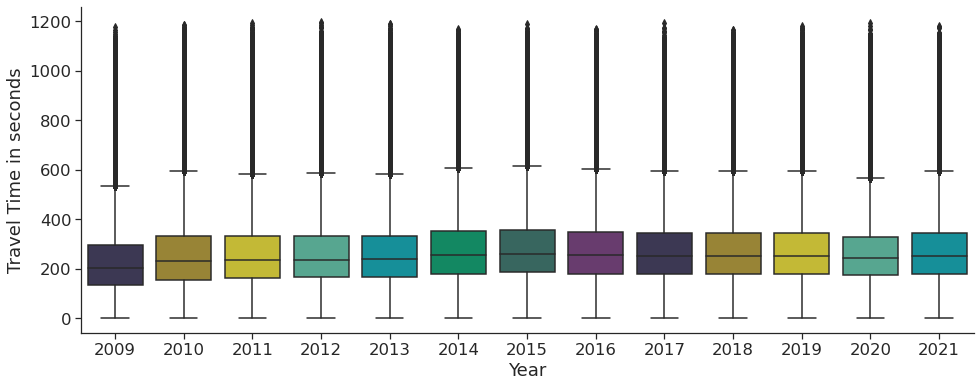

In [32]:
ax = sns.boxplot(data=df_mob, x='CalYear', y='TravelTimeSeconds', palette=custom_palette)
ax.set(xlabel='Year', ylabel='Travel Time in seconds')
plt.show()

#### How did the travel time differ by time of day?

- Travel time in seconds also varies by time of day. It is highest at 3pm at 297.86 seconds travel time.
- Lowest travel time is observed between 11am to 7pm.

<center><div><span style="background-color: #03276F; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFFFF; font-size: 25px; font-weight: bold">LFB has the lowest travel times from 11am to 7pm </span></div></center>

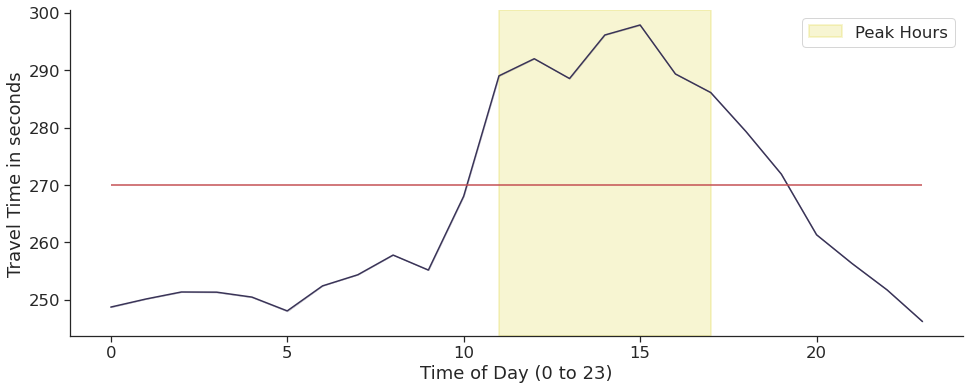

In [33]:
ax = sns.lineplot(data=df_mob,
                  x='HourOfCall',
                  y='TravelTimeSeconds',
                  markers=True,
                  dashes=False,
                  ci=False)
ax.set(xlabel='Time of Day (0 to 23)', ylabel='Travel Time in seconds')
ax.axvspan(11, 17,
           label='Peak Hours',
           color=custom_palette.as_hex()[2], alpha=0.2,
           lw=2)
plt.legend(loc='best')
# plt.vlines(9, 315, 375, colors='b', linestyles='dashed')
# plt.vlines(22, 315, 375, colors='b', linestyles='dashed')
plt.hlines(270, 0, 23, colors='r', linestyles='solid')
plt.show()

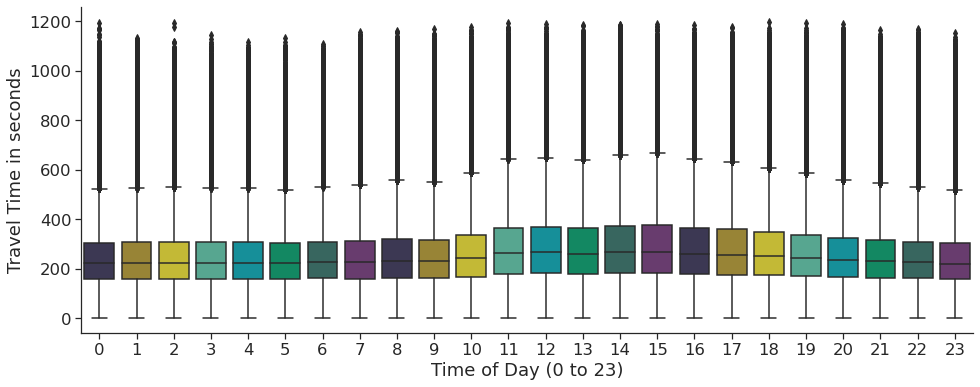

In [34]:
ax = sns.boxplot(data=df_mob, x='HourOfCall', y='TravelTimeSeconds', palette=custom_palette)
ax.set(xlabel='Time of Day (0 to 23)', ylabel='Travel Time in seconds')
plt.show()

<center><div><span style="background-color: #03276F; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFFFF; font-size: 25px; font-weight: bold">Number of Incidents by Type of Incident </span></div></center>

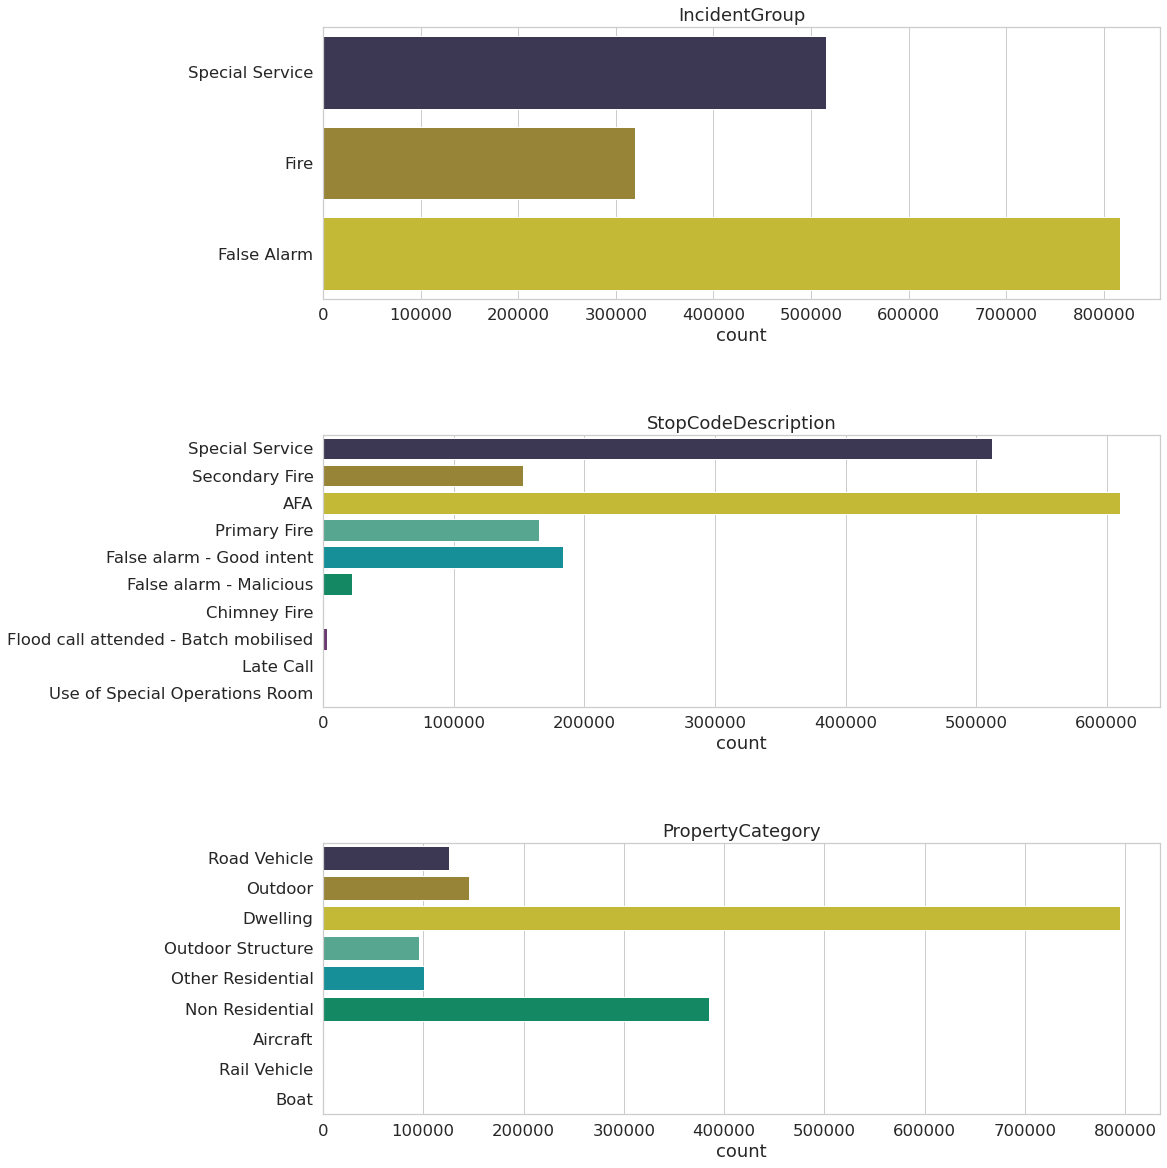

In [ ]:
# plot categorical data
fig, axes = plt.subplots(3, 1, figsize=(15,20))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for ax, feat in zip(axes.flatten(), ['IncidentGroup', 'StopCodeDescription', 'PropertyCategory',]): 
    sns.countplot(data=df_lfb, y=feat, ax=ax, palette=custom_palette)
    ax.set_title(feat)
    ax.set_ylabel('')
    ax.set_xlabel('count')
plt.show()

<center><div><span style="background-color: #03276F; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFFFF; font-size: 25px; font-weight: bold">Average response time by incident also varies </span></div></center>

Response time is fastest for AFA at 338.15 seconds and slowest for Chimney fires at 374.26 seconds

Text(0.5, 0, 'Type of Incident')

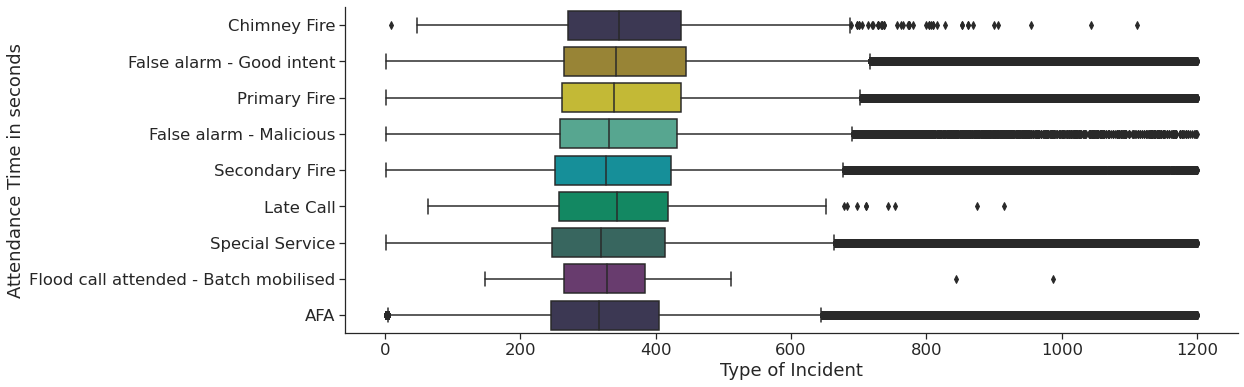

In [15]:
merged = df_lfb.merge(df_mob, on=['IncidentNumber', 'CalYear', 'HourOfCall'])
incident = merged.groupby("StopCodeDescription")["AttendanceTimeSeconds"].mean().sort_values()[::-1].index
fig = sns.boxplot(data=merged, y='StopCodeDescription', x='AttendanceTimeSeconds', order=incident, palette=custom_palette)
fig.set_ylabel('Attendance Time in seconds')
fig.set_xlabel('Type of Incident')

<div><span style="background-color: #26241B; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFFFF; font-size: 24px; font-weight: bold">Conclusion and Recommendations </span></div>

**Conclusions**
- We can conclude that the presence of people within their homes increased the number of reported incidents which is caused by the Pandemic.
- Events that will prevent people from going out of their homes should be taken into account where the fire force should be increasing their resources to deal with a sudden spike of incidents

**Recommendations**
- At times where the total response time is highest and since every second counts when it comes to first response to an incident to save lives, it is recommended to increase an alert level during longest response time to act as hot standby in case of an incident

<h1 style="color:#F73718">References and Acknowledgments</h1>

- About – London Datastore. (2011). London.gov.uk. https://data.london.gov.uk/about/

- About us. (n.d.). Www.london-Fire.gov.uk. https://www.london-fire.gov.uk/about-us/

- Incident response times – Fire Facts – London Datastore. (n.d.). Retrieved October 25, 2022, from https://data.london.gov.uk/dataset/incident-response-times-fire-facts

- London Fire Brigade. (n.d.). Firefighting Wiki. Retrieved October 25, 2022, from https://fire.fandom.com/wiki/London_Fire_Brigade

- London Fire Brigade Incident Records – London Datastore. (2011). London.gov.uk. https://data.london.gov.uk/dataset/london-fire-brigade-incident-records

- Meet London Fire Brigade. (n.d.). Www.london-Fire.gov.uk. Retrieved October 25, 2022, from https://www.london-fire.gov.uk/about-us/meet-london-fire-brigade/